# Рынок общественного питания


## Цели и задачи проекта

Цель проекта заключалась в анализе рынка общественного питания в Москве для разработки стратегии инвестирования: заказчики хотят открыть новое заведение.

Были поставлены следующие задачи: 
- Исследовать распределение заведений общественного питания Москвы по категориям (кафе, бар, ресторан и др.); 
- Пронализировать географическое распределений заведений по административным районам Москвы в зависимости от категории, особенно уделив внимание Центральному административному округу; 
- Изучить количество посадочных мест в заведениях;
- Подсчитать соотношение сетевых и несетевых заведений в том числе и в разрезе категорий; 
- Исследовать средний чек и сравнить цены в разных районах;
- Выделить топ-15 сетевых заведений Москвы в зависимости от их популярности;
- Изучить связь показателя среднего рейтинга с другими показателями (ценовая категория, статус заведения и др.).

## Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка —`5.0`);
* `chain` — число, выраженное`0` или`1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  * `0` — заведение не является сетевым;
  * `1` — заведение является сетевым.
* `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — хранит среднюю стоимость заказа в виде диапазона, например:
  * «Средний счёт: 1000–1500 ₽»;
  * «Цена чашки капучино: 130–220 ₽»;
  * «Цена бокала пива: 400–600 ₽».
    и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца`avg_bill`, начинающихся с подстроки «Средний счёт»:
  * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца`avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
  * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Содержимое проекта


1. Загрузка данных и знакомство с ними
2. Предоработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации

---

## Шаг 1. Загрузка данных и знакомство с ними

### Задача 1. Загрузка данных

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix 

In [143]:
df_rest = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

### Задача 2. Знакомство с данными

In [144]:
# Выводим информацию о датафрейме df_rest
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [145]:
# Выводим первые пять строчек датасета
df_rest.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [146]:
# Знакомимся с датасетом df_price
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [147]:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


#### Промежуточный вывод о полученных данных

В датасете `df_rest` 8406 строчек и 9 столбцов, где содержится информация о кафе и ресторанах Москвы. Пропуски встречаются в столбцах hours и seats.
Типы данных в целом соответствуют содержимому. На этапе предобработки можно поменять тип данных столбца seats с float64 на int64, так как в столбце хранятся целые значения. Также потребуется изменить разрядность столбца chain. 

В датасете `df_price` 4058 строчек и 5 столбцов. В нем содержится информация о ценах в кафе и ресторанах Москвы. Пропуски встречаются в 4 столбцах: price, avg_bill, middle_avg_bill, middle_coffee_cup. 

Типы данных соответствуют содержимому.

В обоих датафреймах названия приведены к snake case.

### Задача 5 (Подготовка единого датафрейма)

In [148]:
# Объединяем датасеты с помощью merge
df = df_rest.merge(df_price, on='id', how='outer')

In [149]:
# Проверяем получившийся датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


In [ ]:
# Сохраним изначальный датафрейм для проверки преобразований и фильтрации

temp = df.copy() 
len(temp)

8406

## Шаг 2. Предобработка данных

### Задача 1. Проверка корректности данных

In [151]:
# Проверяем типы данных столбцов
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [152]:
# Изменяем разрядность столбца chain на более оптимальную
print(f"Старый тип df['chain']: {df['chain'].dtype}")
df['chain'] = pd.to_numeric(df['chain'], downcast='integer') 
print(f"Новый тип df['chain']: {df['chain'].dtype}")

Старый тип df['chain']: int64
Новый тип df['chain']: int8


In [153]:
# Подготавливаем столбец seats: заменяем пропуски значением-заглушкой -1 и меняем тип данных на int32
print(f"Старый тип df['seats']: {df['seats'].dtype}")
print(f"Количество NaN до преобразования: {df['seats'].isna().sum()}")
df['seats'] = df['seats'].fillna(-1).astype('int32')
print(f"Новый тип df['seats']: {df['seats'].dtype}")

# Возвращаем NaN на место
mask = df['seats']==-1
df.loc[mask, 'seats'] = np.nan
print(f"Количество NaN после преобразования: {df['seats'].isna().sum()}")

Старый тип df['seats']: float64
Количество NaN до преобразования: 3611
Новый тип df['seats']: int32
Количество NaN после преобразования: 3611


### Задача 2. Изучение пропущенных значений

In [154]:
# Проверяем количество пропусков 
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [155]:
# Рассчитываем долю строк с пропусками
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

#### Предварительный вывод о характере пропусков

Пропуски могли появиться из-за особенности алгоритмов сервисов Яндекса. Информация о часах работы, количестве мест в заведении и ценах берется из отзывов или предоставляется владельцами. 

Меньше всего пропусков содержится в столбце hours (часы работы): эти значения вносятся для отображения актуальной информации для посетителей.

Больше всего пропусков в столбце middle_coffee_cup. Средняя цена чашки кофе обычно отображается только для кофеен. В других заведениях напитки входят в средний чек.

Для преобразований типов из float64 в int32 можно выбрать значение-заглушку: это подошло для столбца seats.

### Задача 3. Проверка данных на явные и неявные дубликаты

In [156]:
# Нормализуем данные в текстовых столбцах: переведем в нижний регистр и избавимся от конечных пробелов
df['name'] = df['name'].str.lower().str.strip()
df['category'] = df['category'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()
df['district'] = df['district'].str.lower().str.strip()
df['hours'] = df['hours'].str.lower().str.strip()
df['price'] = df['price'].str.lower().str.strip()

In [157]:
# Проверяем явные дубликаты в датафрейме
df.duplicated().sum()

np.int64(0)

In [158]:
# Проверяем неявные дубликаты в столбце category
df['category'].unique()

array(['ресторан', 'кофейня', 'кафе', 'бар,паб', 'быстрое питание',
       'пиццерия', 'столовая', 'булочная'], dtype=object)

In [159]:
# Проверяем названия заведений
df['name'].value_counts()

name
кафе                189
шоколадница         120
домино'с пицца       77
додо пицца           74
one price coffee     72
                   ... 
пеликан               1
любимый город         1
id cafe               1
культ вкуса           1
гивисациви            1
Name: count, Length: 5512, dtype: int64

In [160]:
# Проверяем дубликаты в столбце district
sorted(df['district'].unique())

['восточный административный округ',
 'западный административный округ',
 'северный административный округ',
 'северо-восточный административный округ',
 'северо-западный административный округ',
 'центральный административный округ',
 'юго-восточный административный округ',
 'юго-западный административный округ',
 'южный административный округ']

In [161]:
# Проверяем аномальные значения, выводим статистику датафрейма
df.describe()

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
count,8406.000000,8406.000000,4795.000000,3149.000000,535.000000
mean,4.229895,0.381275,108.421689,958.053668,174.721495
std,0.470348,0.485729,122.833396,1009.732845,88.951103
min,1.000000,0.000000,0.000000,0.000000,60.000000
25%,4.100000,0.000000,40.000000,375.000000,124.500000
50%,4.300000,0.000000,75.000000,750.000000,169.000000
75%,4.400000,1.000000,140.000000,1250.000000,225.000000
max,5.000000,1.000000,1288.000000,35000.000000,1568.000000


In [162]:
# Проверяем неявные дубликаты по столбцу name и address
incomplete_dup = df.duplicated(subset=['name', 'address'], keep=False)
print(df[incomplete_dup][['name', 'address']])
# Удаляем обнаруженные неявные дубликаты
df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=True)

                           name                                  address
211                        кафе             москва, парк ангарские пруды
1932            хлеб да выпечка              москва, ярцевская улица, 19
3205                  more poke  москва, волоколамское шоссе, 11, стр. 2
4466                       кафе             москва, парк ангарские пруды
5432                  more poke  москва, волоколамское шоссе, 11, стр. 2
5580  раковарня клешни и хвосты               москва, проспект мира, 118
6474  раковарня клешни и хвосты               москва, проспект мира, 118
6903            хлеб да выпечка              москва, ярцевская улица, 19


### Задача 4. Создание столбца с обозначением круглосуточной и ежедневной работы заведения

In [163]:
df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно', case=False, na=False)

In [164]:
# Проверяем количество заведений
df['is_24_7'].value_counts()

is_24_7
False    7672
True      730
Name: count, dtype: int64

In [165]:
# Проверим количество удаленных строк

a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
     '\n', "Удалено строк в датасете после обработки", a-b,
     '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


### Промежуточный вывод
1. Целочисленные данные столбца chain были приведены к оптимальной разрядности.
2. Пропуски в столбце seats были заменены значением-заглушкой для перевода в int32, после этого пропуски были возвращены на место.
3. Создан столбец с обозначением круглосуточной работы заведения.
4. Все категориальные данные были приведены к нижнему регистру. 
5. Было обнаружено 4 строчки, у которых были неявные дубликаты. Они были удалены. Было удалено 0.05% от всего датасета.

## Шаг 3. Исследовательский анализ данных

### Задача 1. Исследование категорий заведения в данных

In [166]:
# Количество заведений общественного питания по категориям в абсолютных значениях
df.groupby('category')['name'].count().sort_values(ascending=False)

category
кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: name, dtype: int64

In [167]:
# Количество заведений общественного питания по категориям в относительных значениях
(df.groupby('category')['name'].count()/len(df)).sort_values(ascending=False)

category
кафе               0.282790
ресторан           0.242918
кофейня            0.168174
бар,паб            0.091050
пиццерия           0.075339
быстрое питание    0.071769
столовая           0.037491
булочная           0.030469
Name: name, dtype: float64

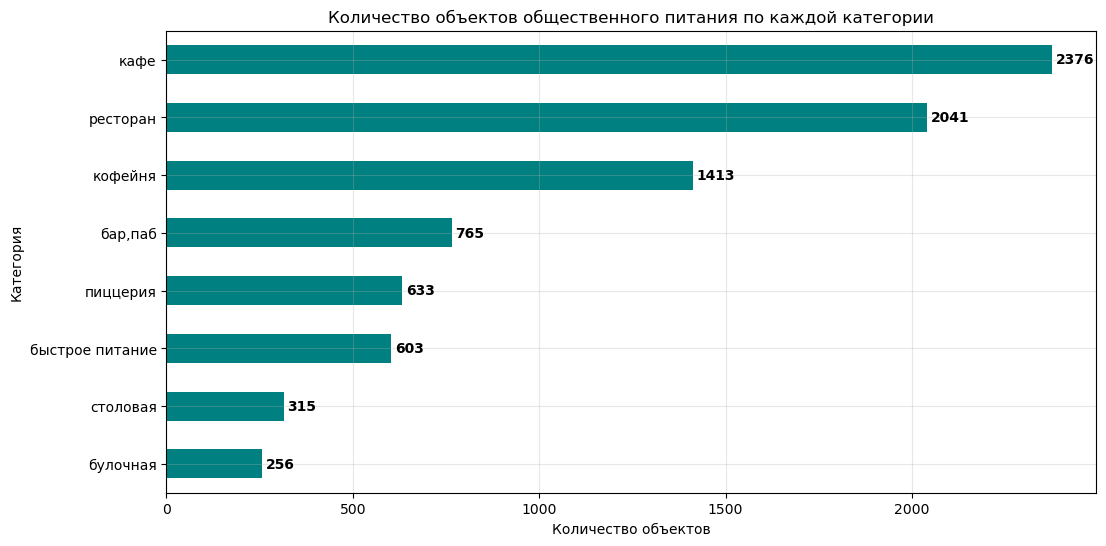

In [168]:
# Выводим столбчатую диаграмму
counts = df.groupby('category')['name'].count().sort_values()
ax = counts.plot(
    kind='barh',
    color='teal',
    figsize=(12, 6)
)
plt.title('Количество объектов общественного питания по каждой категории')
plt.xlabel('Количество объектов')
plt.ylabel('Категория')
for i, v in enumerate(counts.values):
    ax.text(v + 10, i, f'{v}', ha='left', va='center', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

Более 50% заведений — это кафе и рестораны (2376 и 2042 точки соответственно). 

Наиболее непопулярный вид заведения — булочные (256 заведений).

### Задача 2. Исследование административных районов Москвы
Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [169]:
# Количество заведений общественного питания в абсолютных значениях
df['district'].value_counts().sort_values(ascending=False)

district
центральный административный округ         2242
северный административный округ             898
южный административный округ                892
северо-восточный административный округ     890
западный административный округ             850
восточный административный округ            798
юго-восточный административный округ        714
юго-западный административный округ         709
северо-западный административный округ      409
Name: count, dtype: int64

In [170]:
# Количество заведений общественного питания в относительных значениях
(df['district'].value_counts()/len(df)).sort_values(ascending=False)


district
центральный административный округ         0.266841
северный административный округ            0.106879
южный административный округ               0.106165
северо-восточный административный округ    0.105927
западный административный округ            0.101166
восточный административный округ           0.094977
юго-восточный административный округ       0.084980
юго-западный административный округ        0.084385
северо-западный административный округ     0.048679
Name: count, dtype: float64

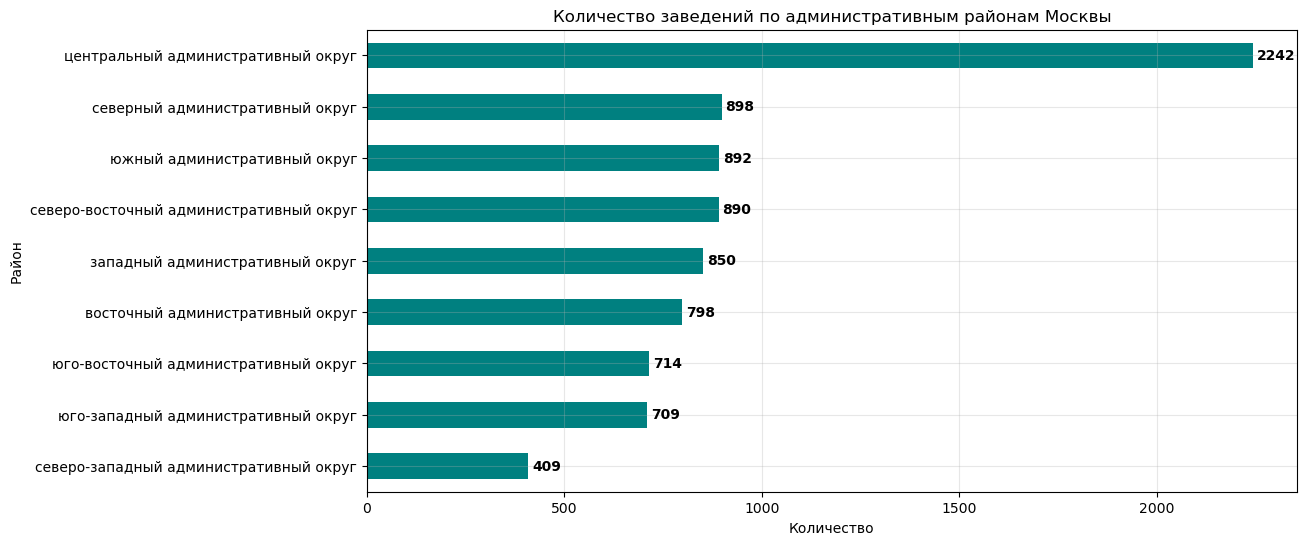

In [171]:
# Выводим столбчатую диаграмму
counts = df['district'].value_counts().sort_values()
ax = counts.plot(
    kind='barh', 
    color='teal',
    figsize=(12, 6))
plt.title('Количество заведений по административным районам Москвы')
plt.ylabel('Район')
plt.xlabel('Количество')
for i, v in enumerate(counts.values):
    ax.text(v + 10, i, f'{v}', ha='left', va='center', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

Значительная часть заведений представлена в ЦАО (26% или 2242 заведения). 

Меньше всего заведений находится в Северо-Западном административном округе (4%). Заведения в остальных районах представлены примерно поровну(8-10%).

In [172]:
# Выводим количество заведений в ЦАО по категориям в абсолютных значениях
df_filtered = df[df['district'] == 'центральный административный округ']
print(f"Количество заведений по категориям в ЦАО в абсолютных значениях:\n" +
      f"{df_filtered.groupby('category')['name'].count().to_string(header=False)}")

Количество заведений по категориям в ЦАО в абсолютных значениях:
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66


In [173]:
# Выводим количество заведений в ЦАО по категориям в относительных значениях
print(f"Количество заведений по категориям в ЦАО в относительных значениях:\n" +
      f"{(df_filtered['category'].value_counts()/len(df_filtered)).sort_values(ascending=False)}")


Количество заведений по категориям в ЦАО в относительных значениях:
category
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: count, dtype: float64


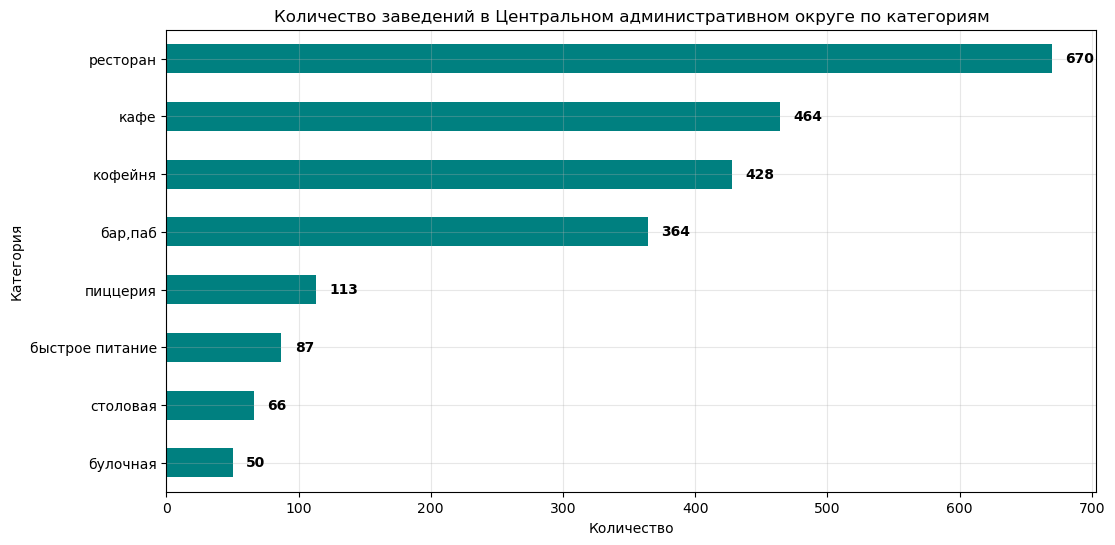

In [174]:
# Выводим столбчатую диаграмму
df_grouped = df_filtered.groupby('category')['district'].count().sort_values()
ax = df_grouped.plot(
    kind='barh',
    color='teal',
    figsize=(12, 6)
)
plt.title('Количество заведений в Центральном административном округе по категориям')
plt.xlabel('Количество') 
plt.ylabel('Категория')
for i, v in enumerate(df_grouped.values):
    ax.text(v + 10, i, f'{v}', ha='left', va='center', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

Преобладающая категория заведения в ЦАО — это рестораны (почти 30% от общего числа заведений или 670). Менее всего представлены там булочные (2%).

### Задача 3. Изучение соотношения сетевых и несетевых заведений

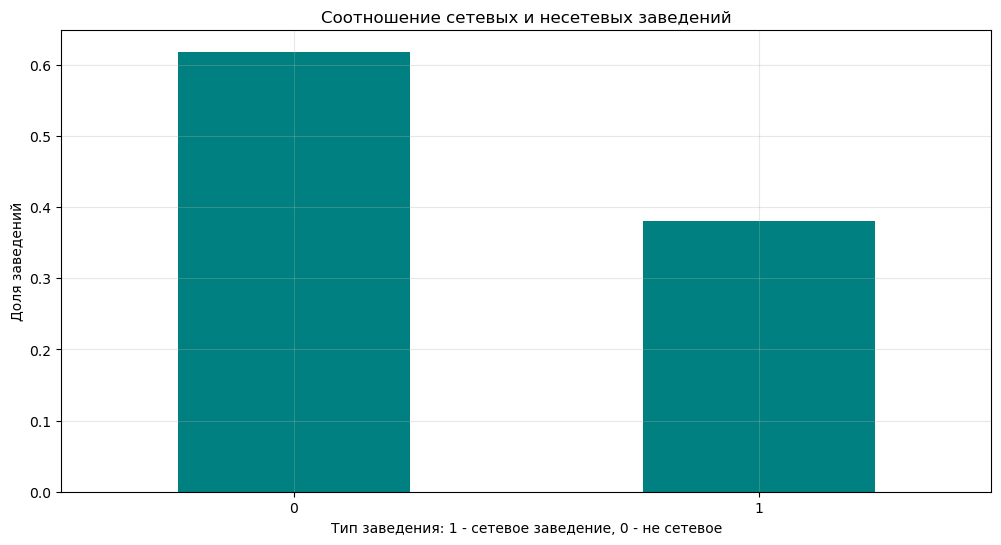

In [175]:
# Выводим столбчатую диаграмму
df['chain'].value_counts(normalize=True).plot(
    kind='bar',
    color='teal',
    figsize=(12, 6),
    rot=0
)
plt.grid(True, alpha=0.3)
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения: 1 - сетевое заведение, 0 - не сетевое')
plt.ylabel('Доля заведений') 
plt.show()

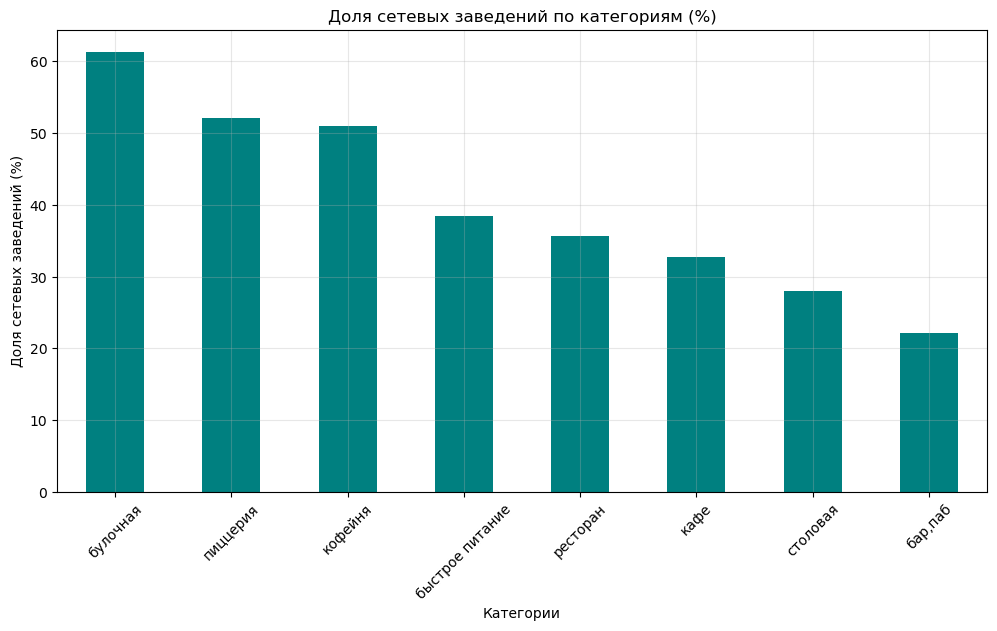

In [176]:
# Подсчет сетевых заведений по категориям
chain_by_category = df.groupby('category')['chain'].sum()

# Общее количество заведений по категориям  
total_by_category = df.groupby('category').size()

# Доля сетевых заведений (в процентах)
share_chain = (chain_by_category / total_by_category * 100).sort_values(ascending=False)

# Визуализация
share_chain.plot(
    kind='bar', 
    color='teal',
    figsize=(12, 6),
    rot=45
)
plt.title('Доля сетевых заведений по категориям (%)')
plt.xlabel('Категории')
plt.ylabel('Доля сетевых заведений (%)')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

1. Несетевые и сетевые заведения представлены в соотношении 60/40. 
2. Чаще всего сетевыми заведениями являются булочные и пиццерии, а реже — бары или пабы. 

### Задача 4. Исследование количества посадочных мест в заведениях

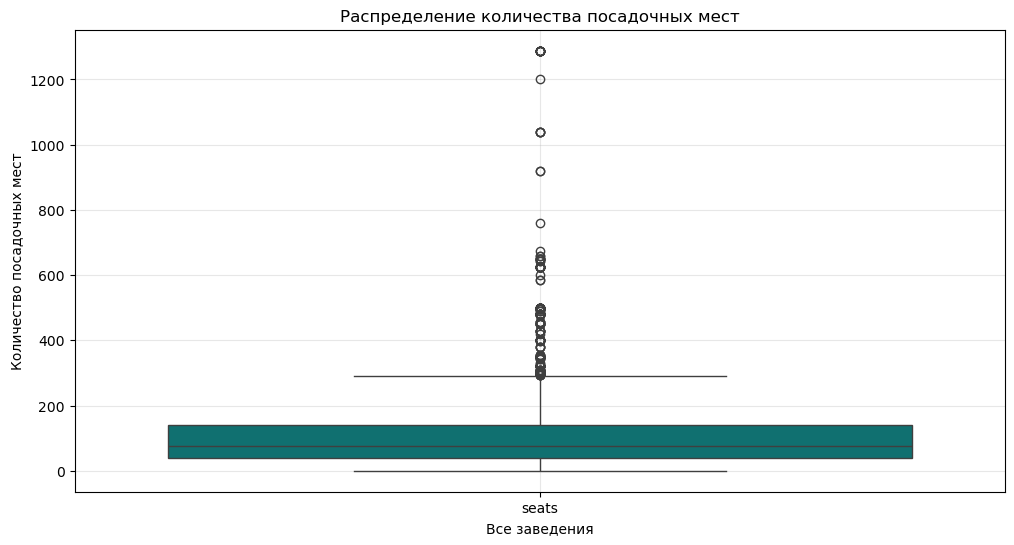

In [177]:
# Выводим «ящик с усами»
plt.figure(figsize=(12, 6))

sns.boxplot(data = df[['seats']].dropna(),
            color = 'teal')
plt.title('Распределение количества посадочных мест')
plt.ylabel('Количество посадочных мест')
plt.xlabel('Все заведения')
plt.grid(True, alpha=0.3)
plt.show()

Сводная статистика параметра seats:
count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


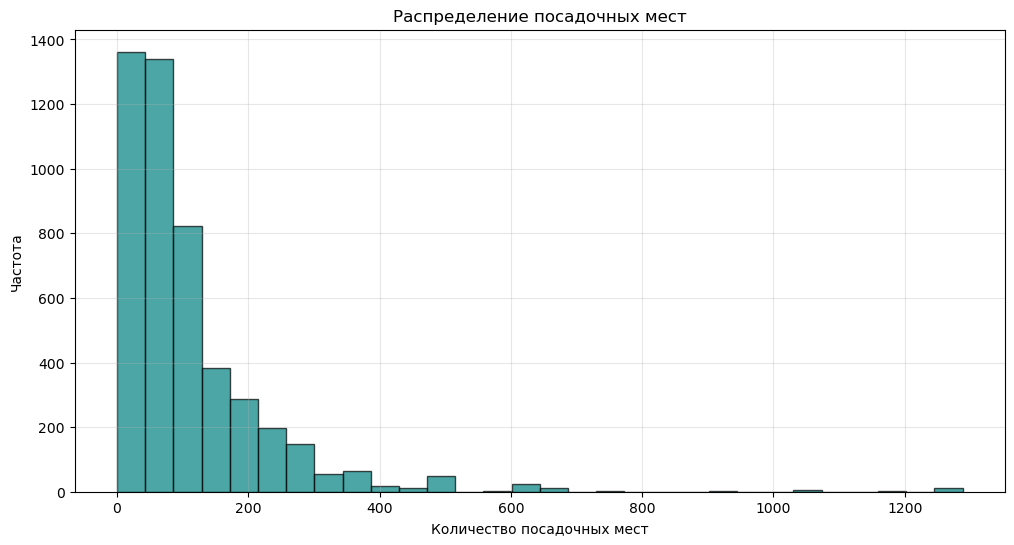

In [178]:
# Выводим диаграмму размаха

print(f"Сводная статистика параметра seats:\n{df['seats'].describe()}")

plt.figure(figsize=(12, 6))

seats_clean = df['seats'].dropna()
plt.hist(seats_clean, bins=30, color='teal', alpha=0.7, edgecolor='black')

plt.title('Распределение посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

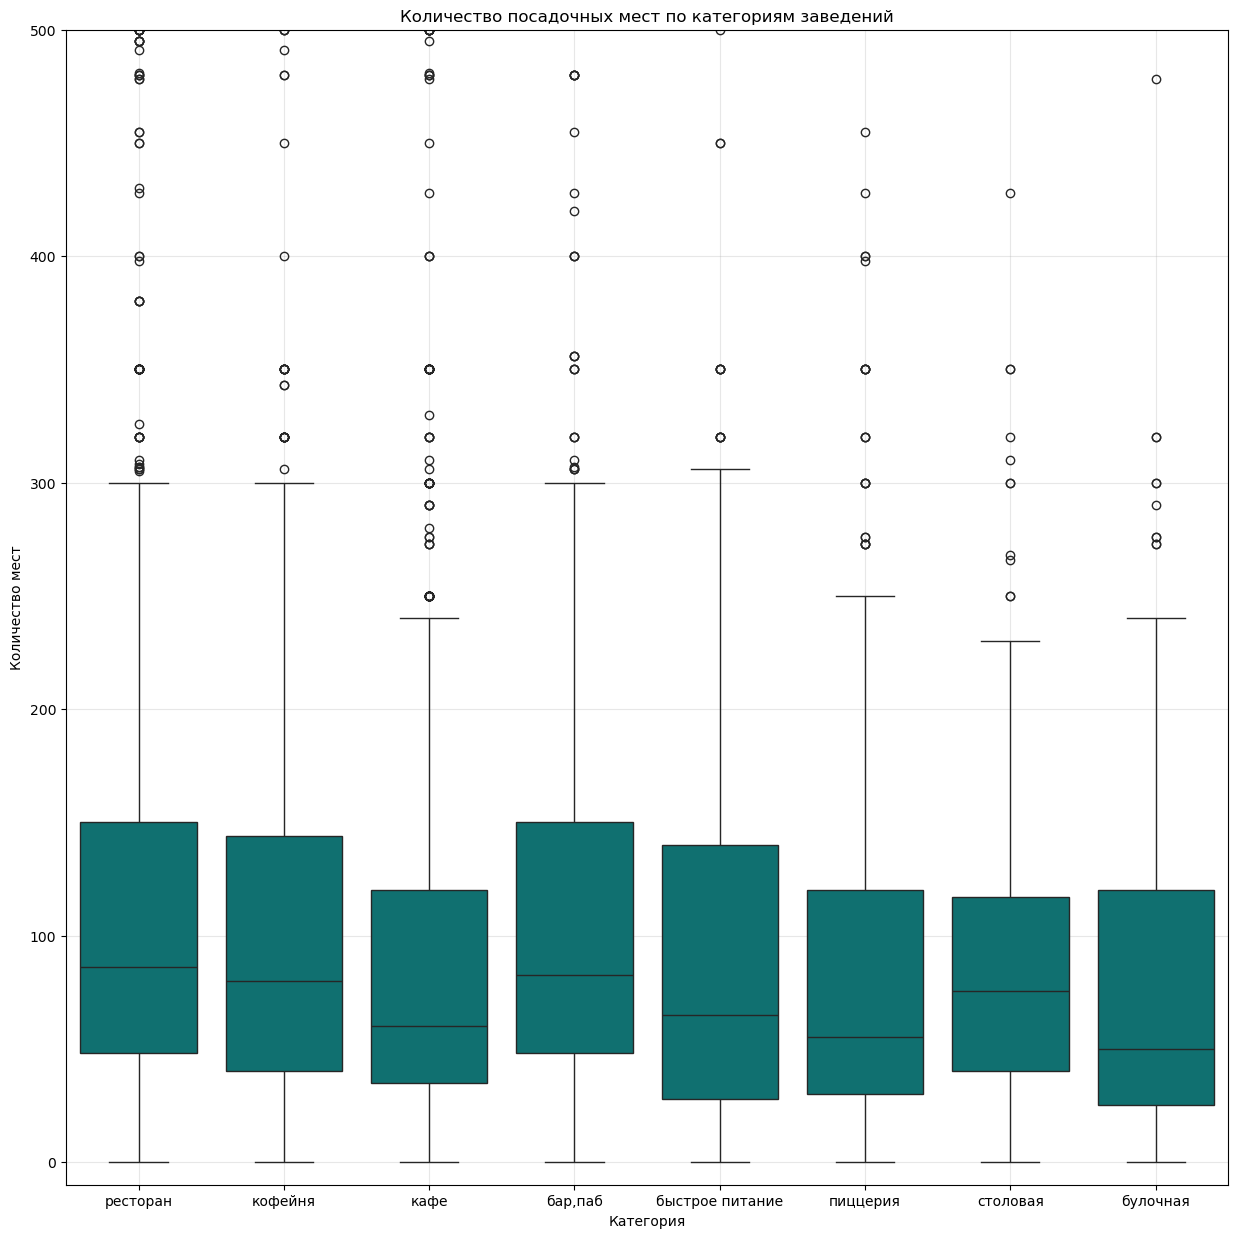

In [179]:
# Выводим «ящик с усами» для количества посадочных мест по категориям заведений
plt.figure(figsize=(15, 15))
sns.boxplot(
    data=df,
    x='category',
    y='seats',
    color='teal'
)
plt.ylim(-10, 500)
plt.title('Количество посадочных мест по категориям заведений')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.grid(True, alpha=0.3)
plt.show()

In [180]:
# Выводим типичное количество посадочных мест по категориям
print(f"Типичное количество посадочных мест по каждой категории:\n" +
      f"{df.groupby('category')['seats'].median().sort_values(ascending=False)}")

Типичное количество посадочных мест по каждой категории:
category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64


#### Вывод

В данных встречаются аномалии и выбросы. Это может быть связано с тем, что объект общественного питания находится в фудкорте ТЦ или на вокзалах/аэропортах. Это подкрепляется тем, что большой разброс данных наблюдается у категории быстрого питания, обычно располагающегося в местах с большим количеством посадочных мест. 

У ресторанов, в отличие от остальных категорий заведений, в среднем самое большое количество посадочных мест. Самое маленькое типичное количество посадочных мест представлено у булочных. Это можно объяснить тем, что булочные ориентированы на быстрый поток и take-away и как правило имеют небольшое количество посадочных мест. 

### Задача 5. Исследование рейтинга заведений

In [181]:
# Выводим сводную статистику
print(f"Сводная статистика рейтингов всех заведений общественного питания\n" +
      f"{df['rating'].describe()}")

Сводная статистика рейтингов всех заведений общественного питания
count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


In [182]:
# Выводим сводную статистику по категориям
print(f"Сводная статистика средних рейтингов по категориям заведений\n" +
      f"{df.groupby('category')['rating'].describe()}")

Сводная статистика средних рейтингов по категориям заведений
                  count      mean       std  min  25%  50%  75%  max
category                                                            
бар,паб           765.0  4.387712  0.380143  1.1  4.3  4.4  4.6  5.0
булочная          256.0  4.268359  0.386303  1.3  4.2  4.3  4.4  5.0
быстрое питание   603.0  4.050249  0.560949  1.1  3.9  4.2  4.3  5.0
кафе             2376.0  4.124285  0.566001  1.0  4.0  4.2  4.4  5.0
кофейня          1413.0  4.277282  0.372250  1.4  4.1  4.3  4.4  5.0
пиццерия          633.0  4.301264  0.336162  1.0  4.2  4.3  4.4  5.0
ресторан         2041.0  4.290348  0.413237  1.0  4.2  4.3  4.5  5.0
столовая          315.0  4.211429  0.454205  1.0  4.1  4.3  4.4  5.0


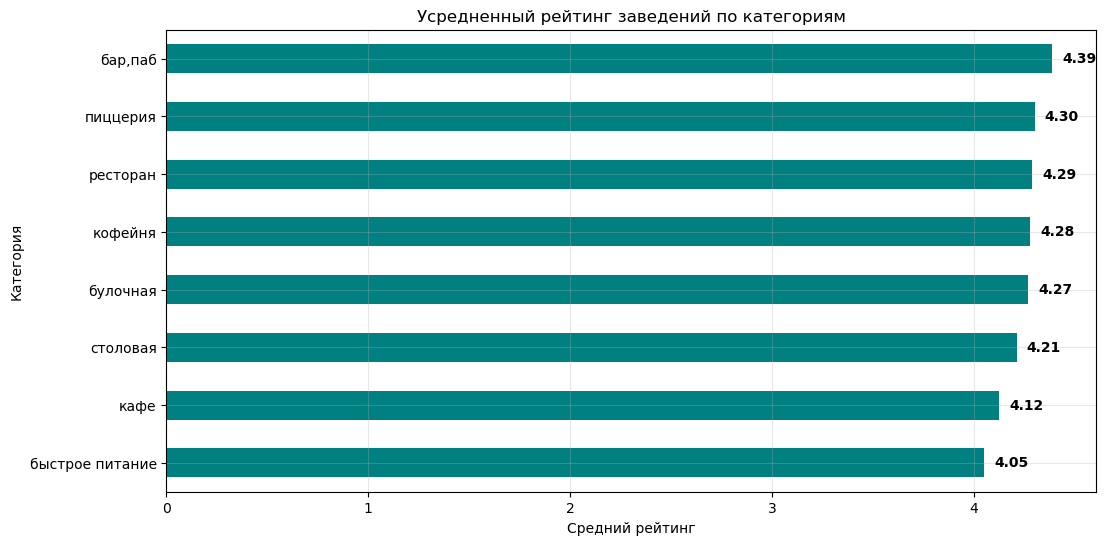

In [183]:
# Выводим столбчатую диаграмму
counts = df.groupby('category')['rating'].mean().sort_values()

ax = counts.plot(
    kind='barh',
    color='teal',
    figsize=(12, 6)
)

plt.title('Усредненный рейтинг заведений по категориям')
plt.xlabel('Средний рейтинг')
plt.ylabel('Категория')
for i, v in enumerate(counts.values):
    ax.text(v + 0.05, i, f'{v:.2f}', ha='left', va='center', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

Усредненный рейтинг мало отличается для разных типов общепита. Самые большие значения встречаются у категории бара/паба, тогда как самые маленькие — у быстрого питания (обычно подразумевающего быстрое обслуживание). 

Остальные категории представлены равномерно.

### Задача 6. Исследование корреляции рейтинга заведений

interval columns not set, guessing: ['rating', 'chain', 'seats']


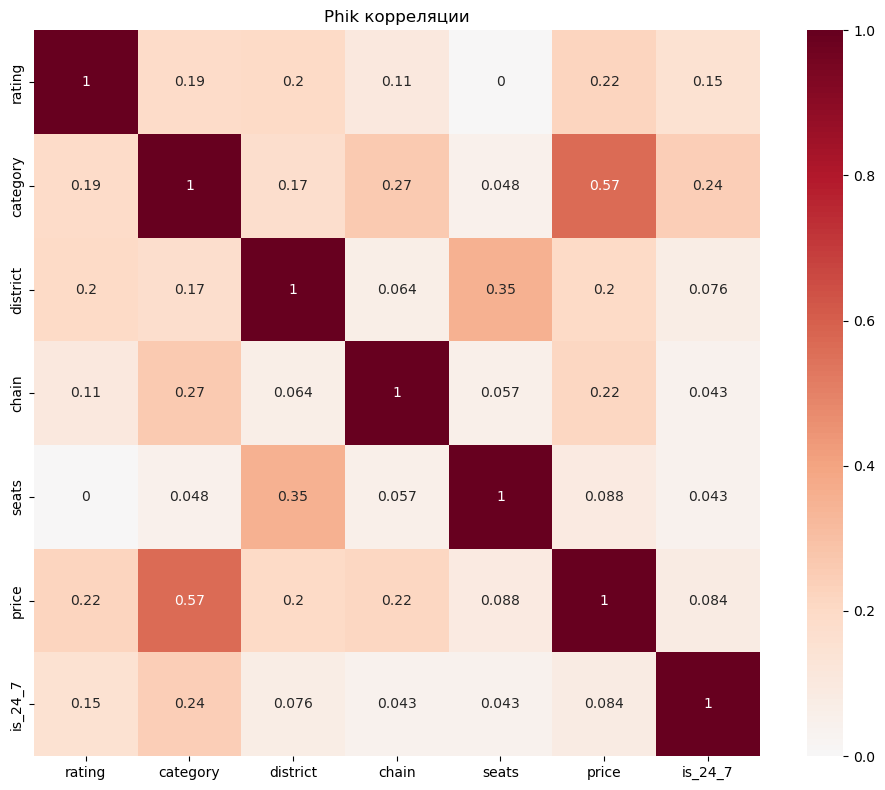

In [184]:
# Выводим phik 
features = ['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']
df_sub = df[features].copy()

correlation_matrix = df_sub.phik_matrix()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='RdBu_r', 
    center=0, 
    square=True)
plt.title('Phik корреляции')
plt.tight_layout()
plt.show()

In [185]:
# Выводим корреляции только с рейтингом
rating_corr = correlation_matrix['rating'].sort_values(ascending=False)

print("Корреляции с рейтингом:")
for feature, corr in rating_corr.drop('rating').items():
    print(f"{feature}: {corr:.3f}")

Корреляции с рейтингом:
price: 0.220
district: 0.201
category: 0.190
is_24_7: 0.150
chain: 0.108
seats: 0.000


In [186]:
# Выводим среднего рейтинга по ценовым категориям
print('Средний рейтинг по ценовым категориям:')
price_rating = df.groupby('price')['rating'].agg(['mean', 'count', 'std']).round(2)
print(price_rating)

Средний рейтинг по ценовым категориям:
               mean  count   std
price                           
высокие        4.44    478  0.31
выше среднего  4.39    564  0.22
низкие         4.17    156  0.37
средние        4.30   2117  0.30


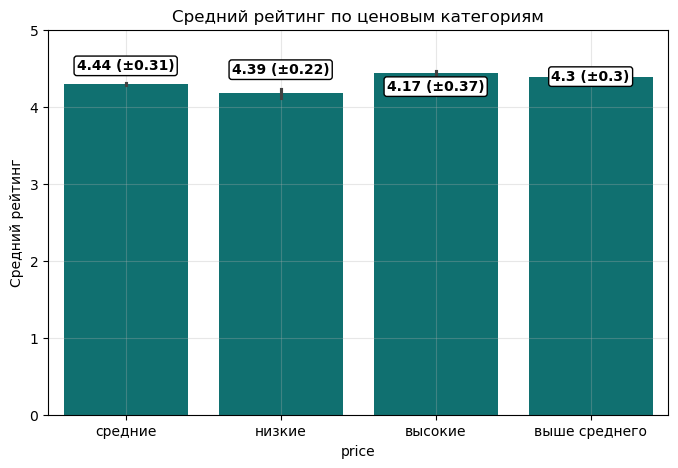

In [187]:
# Выводим столбчатую диаграмму со средним рейтингом по ценовым категориям

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df, 
    x='price', 
    y='rating',
    color='teal'
)

plt.title('Средний рейтинг по ценовым категориям')
plt.ylabel('Средний рейтинг')
plt.ylim(0, 5)

# Добавляем значения и СКО над столбиками
for i, (price, row) in enumerate(price_rating.iterrows()):
    mean_val = row['mean']
    std_val = row['std']
    label = f'{mean_val} (±{std_val})'
    ax.text(i, mean_val, label, 
            ha='center', va='bottom', 
            fontweight='bold', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.2", facecolor="white"))
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

Ценовая категория демонстрирует самую сильную связь с рейтингом (0.220). Умеренная корреляция рейтинга прослеживается с районом (0.201), что может быть связано с конкуренцией в ЦАО. Категория (0.190) и круглосуточность (0.150) имеют заметную, но слабую корреляцию, наличие сети (0.108) и количество мест (0.000) практически не влияют на рейтинг заведения.

Рестораны с высокими ценами имеют наивысший средний рейтинг (4.44), а у заведений в "низкой" ценовой категории наименьший рейтинг (4.17). Наименьшее СКО у ценовой категории "Выше среднего" (0.22), наибольшее - у ценовой категории "Низкие" (0.37).

### Задача 7. Топ-15 популярных сетей в Москве

Отфильтруем данные для анализа: выберем те заведения, параметр chain у которых равен 1 (т.е. это сеть, как требуется по заданию). Также уберем из выборки заведения с названием "яндекс лавка", чтобы не искажать данные, т.к. это не рестораны, как указано в предоставленной базе, а дарксторы службы доставки.

In [188]:
df_chains = df[(df['chain'] == 1) & (df['name'] != 'яндекс лавка')]

top_chains = (
    df_chains.groupby(['name', 'category'])
      .agg(count=('name', 'count'), 
           rating_mean=('rating', 'mean'))
      .sort_values('count', ascending=False)
      .head(15)
      .reset_index()
)
top_chains

,name,category,count,rating_mean
0,шоколадница,кофейня,119,4.178151
1,домино'с пицца,пиццерия,76,4.169737
2,додо пицца,пиццерия,74,4.286486
3,one price coffee,кофейня,71,4.064789
4,cofix,кофейня,65,4.075385
5,prime,ресторан,49,4.114286
6,кофепорт,кофейня,42,4.147619
7,кулинарная лавка братьев караваевых,кафе,39,4.394872
8,теремок,ресторан,36,4.105556
9,cofefest,кофейня,31,3.977419


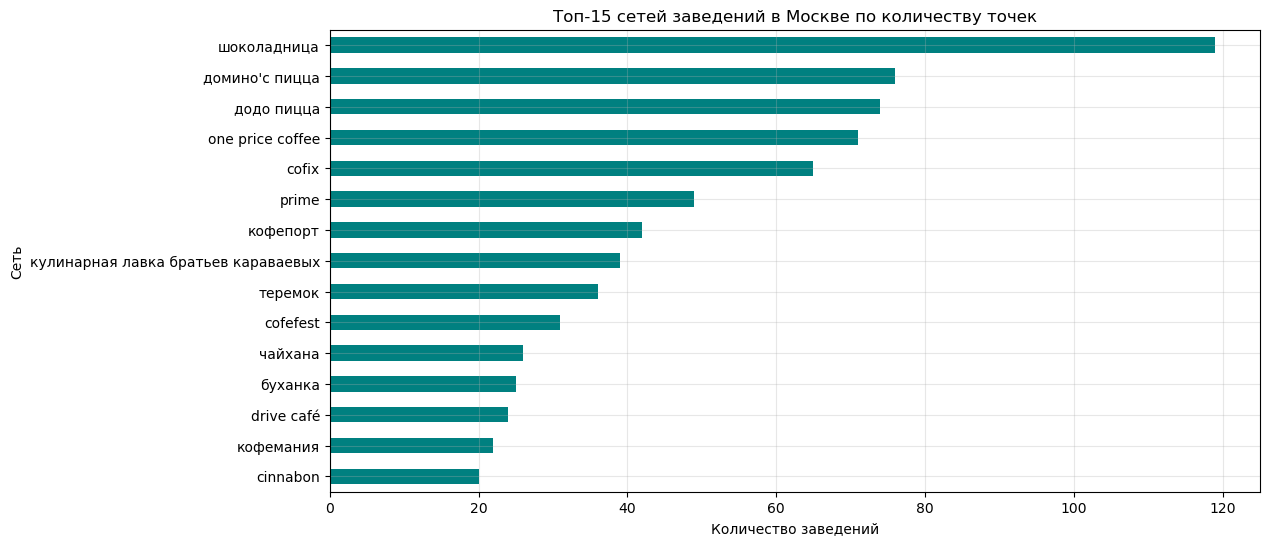

In [189]:
### Выводим топ-15 сетей на столбчатой диаграмме

counts = top_chains.sort_values('count')
ax = counts.plot(
    kind='barh',
    x='name',
    y='count',
    color='teal',
    figsize=(12, 6),
    legend=False
)
plt.title('Топ-15 сетей заведений в Москве по количеству точек')
plt.xlabel('Количество заведений')
plt.ylabel('Сеть')
plt.grid(True, alpha=0.3)
plt.show()

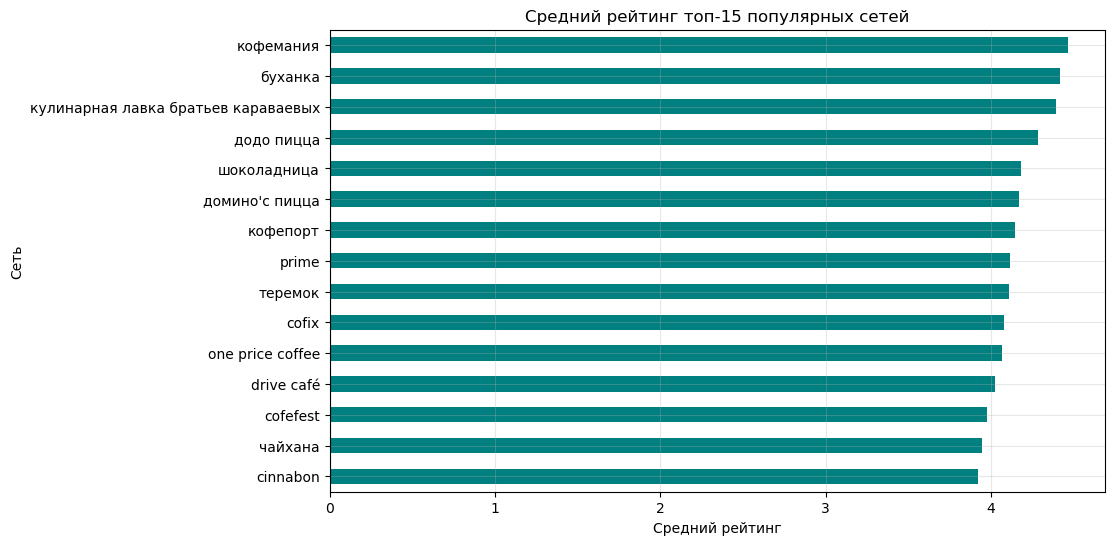

In [190]:
# Выводим средний рейтинг топ-15 популярных сетей 
top_chains.sort_values('rating_mean').plot(
    kind='barh',
    x='name',
    y='rating_mean',
    figsize=(10, 6),
    color='teal',
    legend=False
)

plt.title('Средний рейтинг топ-15 популярных сетей')
plt.xlabel('Средний рейтинг')
plt.ylabel('Сеть')
plt.grid(True, alpha=0.3)
plt.show()

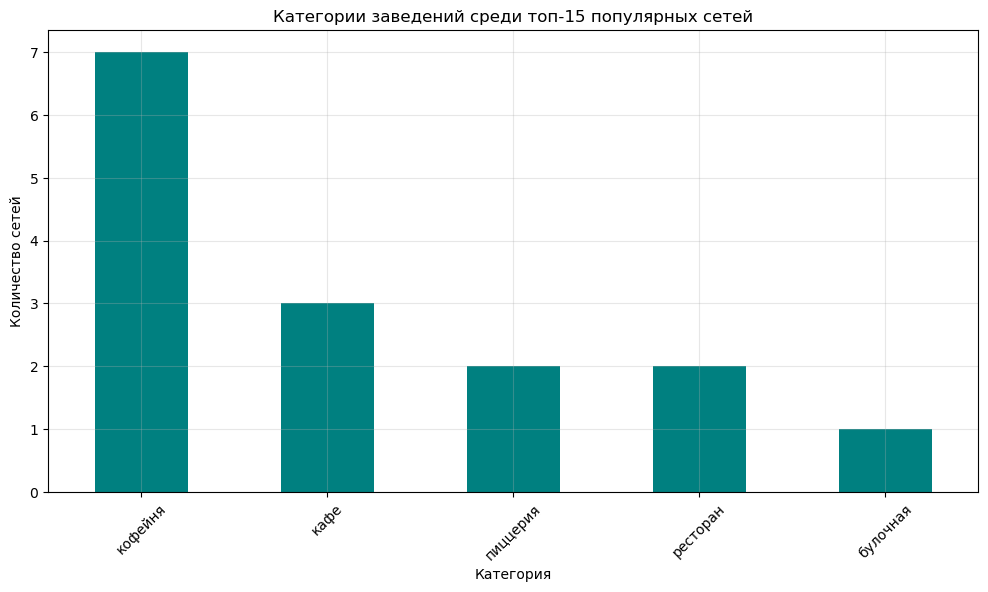

In [191]:
# Выводим категории заведений на столбчатой диаграмме
top_chains['category'].value_counts().plot(
    kind='bar',
    figsize=(12, 6),
    color='teal',
    legend=False
)

plt.title('Категории заведений среди топ-15 популярных сетей')
plt.xlabel('Категория')
plt.ylabel('Количество сетей')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

1. Самая популярная сеть Москвы — «Шоколадница». При этом оно находится на шестом месте в топе усредненного рейтинга.
2. Первое место по среднему рейтингу занимает «Кофемания». Самый низкий рейтинг у сети Cinnabon.
3. Наиболее многочисленные сетевые заведения — это кофейни. Наименее распространенные — булочные. 


### Задача 8. Исследование вариации среднего чека в зависимости от района Москвы

Сводная статистика параметра middle_avg_bill:
count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64


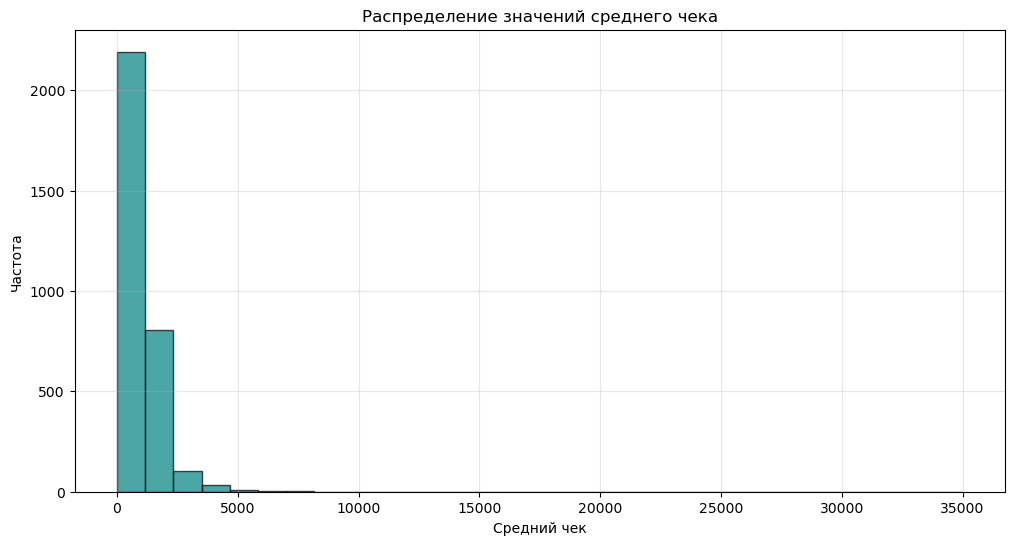

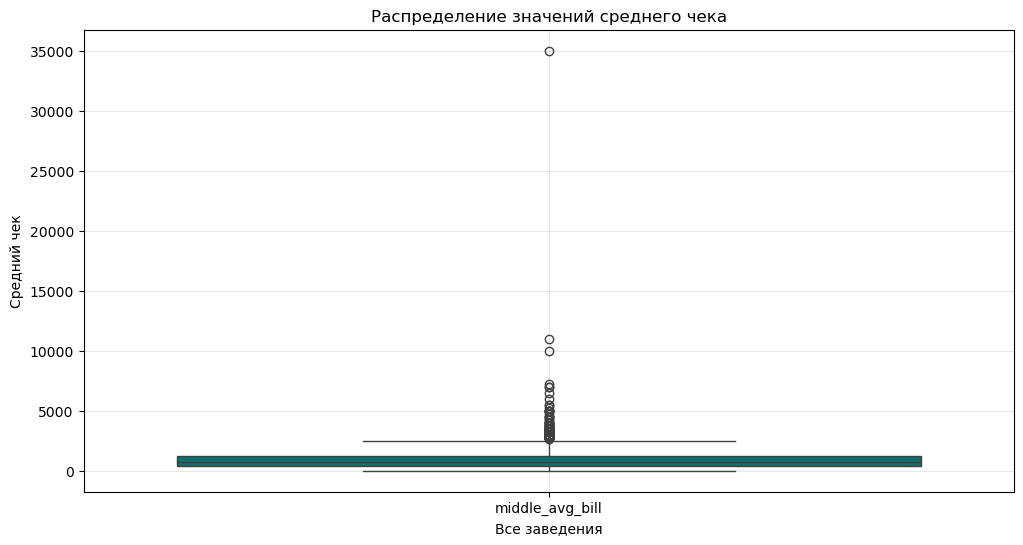

In [192]:
# Выводим сводную статистику параметра
print(f"Сводная статистика параметра middle_avg_bill:\n{df['middle_avg_bill'].describe()}")

plt.figure(figsize=(12, 6))

seats_clean = df['middle_avg_bill'].dropna()
plt.hist(seats_clean, bins=30, color='teal', alpha=0.7, edgecolor='black')

plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 6))

sns.boxplot(data = df[['middle_avg_bill']].dropna(),
            color = 'teal')
plt.title('Распределение значений среднего чека')
plt.ylabel('Средний чек')
plt.xlabel('Все заведения')
plt.grid(True, alpha=0.3)
plt.show()

In [193]:
df_bill = df.copy()

# если есть пропуски
df_bill = df_bill.dropna(subset=['middle_avg_bill', 'district'])

In [194]:
# Выводим Медианы и средние значения среднего чека заведений по административным округам
bill_stats = (df.groupby('district')['middle_avg_bill']
              .agg(['median', 'mean'])
              .reset_index())
print(f"Медианы и средние значения среднего чека заведений по административным округам\n{bill_stats}") 

Медианы и средние значения среднего чека заведений по административным округам
                                  district  median         mean
0         восточный административный округ   575.0   820.626923
1          западный административный округ  1000.0  1053.225490
2          северный административный округ   650.0   927.959627
3  северо-восточный административный округ   500.0   716.611296
4   северо-западный административный округ   700.0   822.222930
5       центральный административный округ  1000.0  1191.057547
6     юго-восточный административный округ   450.0   654.097938
7      юго-западный административный округ   600.0   792.561702
8             южный административный округ   500.0   834.398089


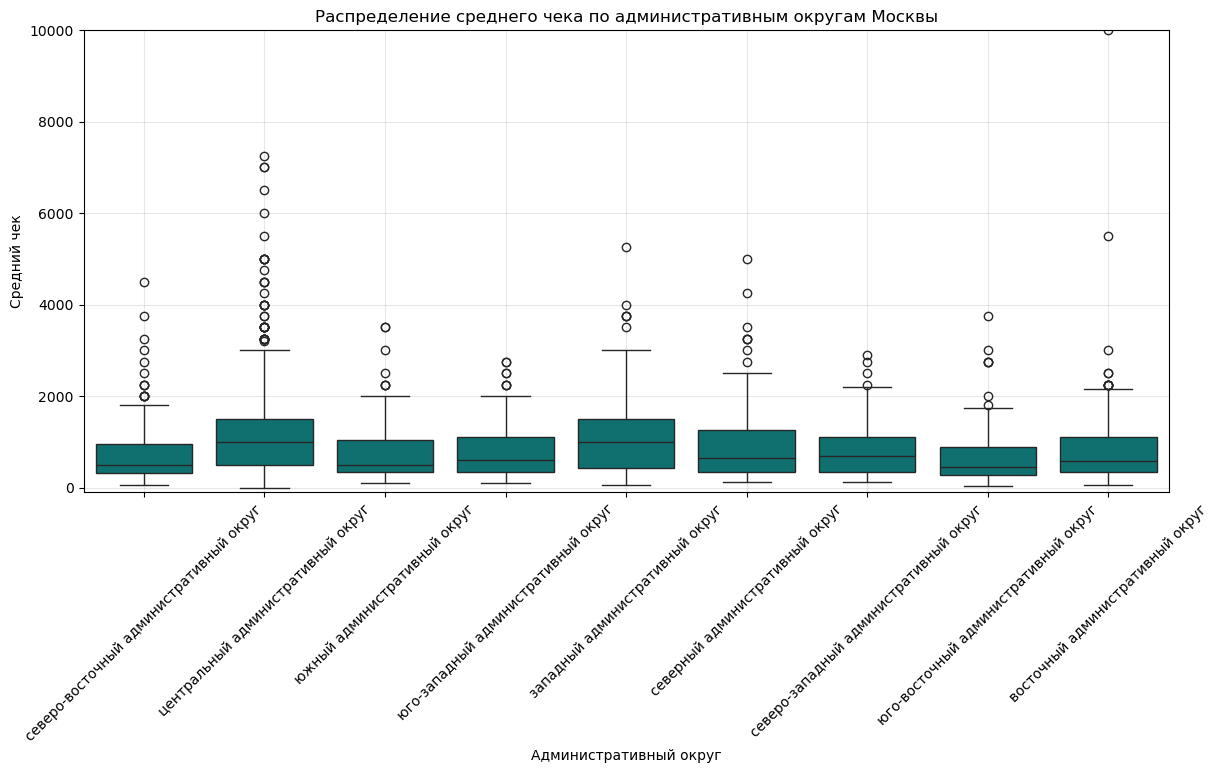

In [195]:
# Выводим распределение среднего чека на «ящике с усами»

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_bill,
    x='district',
    y='middle_avg_bill',
    color='teal'
)
plt.ylim(-100, 10000)
plt.xticks(rotation=45)
plt.title('Распределение среднего чека по административным округам Москвы')
plt.xlabel('Административный округ')
plt.ylabel('Средний чек')
plt.grid(True, alpha=0.3)
plt.show()

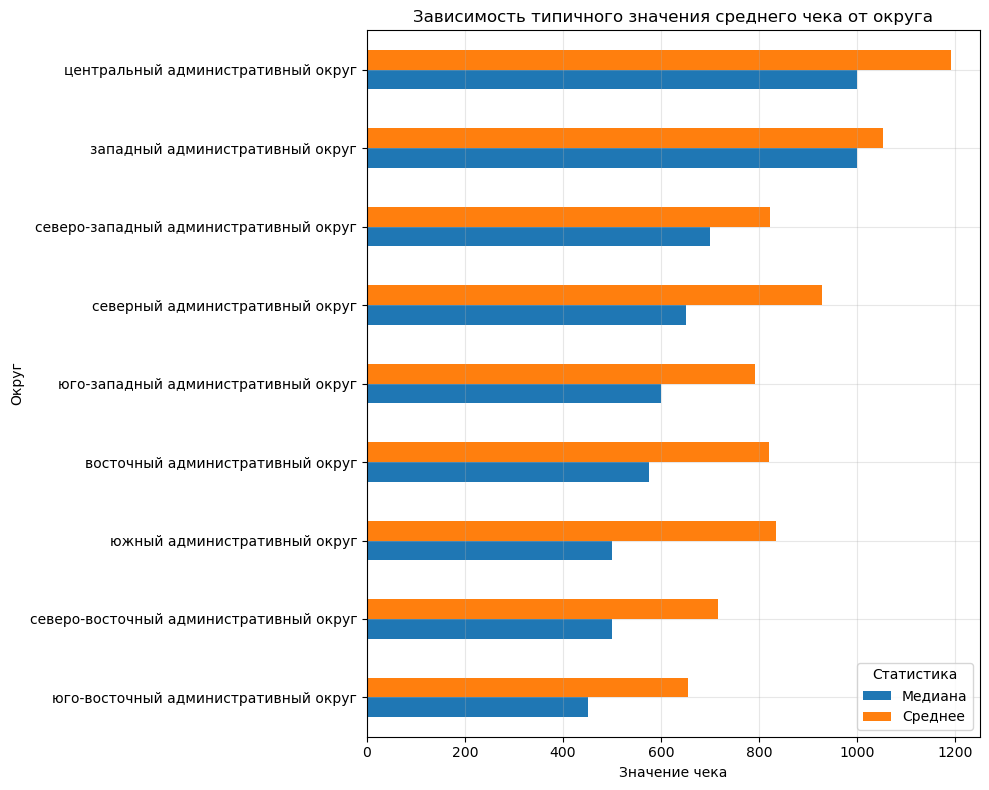

In [196]:
# Выводим столбчатую диаграмму типичного значения среднего чека
ax = bill_stats.sort_values('median', ascending=True).plot(
    x='district',
    y=['median', 'mean'],
    kind='barh',
    figsize=(10, 8)
)

plt.title('Зависимость типичного значения среднего чека от округа')
plt.xlabel('Значение чека')
plt.ylabel('Округ')
plt.legend(title='Статистика', labels=['Медиана', 'Среднее'])
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [197]:
df_bill['is_center'] = df_bill['district'].apply(
    lambda x: 'ЦАО' if x == 'центральный административный округ' else 'Другие округа'
)

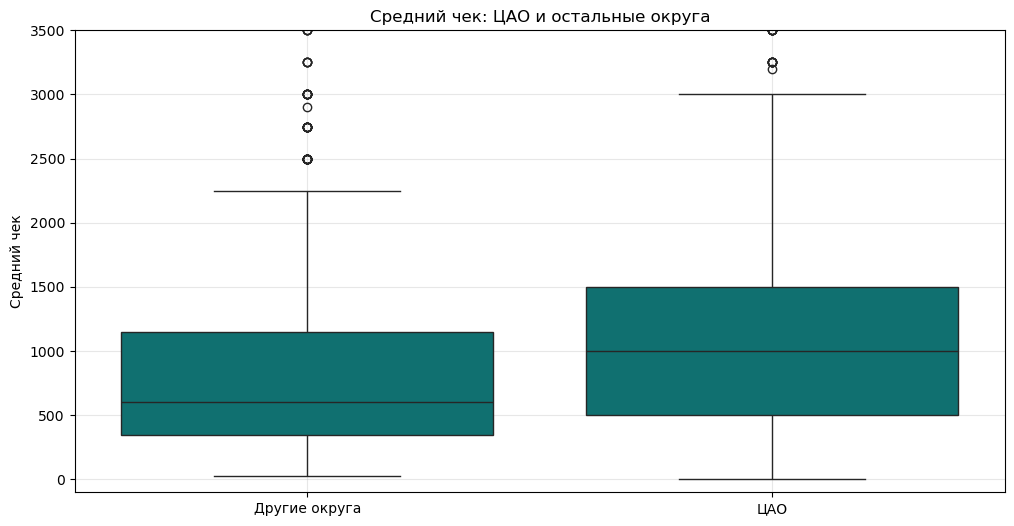

In [198]:
# Выводим «ящик с усами» для ЦАО и остальных округов
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_bill,
    x='is_center',
    y='middle_avg_bill',
    color='teal'
)

plt.ylim(-100, 3500)
plt.title('Средний чек: ЦАО и остальные округа')
plt.xlabel('')
plt.ylabel('Средний чек')
plt.grid(True, alpha=0.3)
plt.show()

#### Вывод

1. Медианные значения среднего чека значительно выше в ЦАО по сравнению с другими округами. 
2. Медианные значения также высоки и в Западном округе (возможно, из-за таких районов как Рублевка), тогда как они значительно ниже в Восточном, Юго-Восточном и Северо-Восточном округах. 

### Промежуточный вывод
Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

1. Самой распространенной категорией заведения общественного питания по Москве является кафе, при этом в ЦАО преобладают рестораны.
2. Большинство заведений являются несетевыми.
3. Средний рейтинг слабо отличается в зависимости от категории заведения.
4. Самая выраженная корреляция заметна между рейтингом и ценовой категорией. Наиболее сильный размах значений рейтинга наблюдается в заведениях, относящихся к низкой ценовой категории, высокие медианные значения видно в заведениях, относящихся к высокой ценовой категории.
5. Самый большой средний чек наблюдается в ЦАО. На востоке города цены ниже, чем на западных направлениях.

## 4. Итоговый вывод и рекомендации

Цель проекта — провести анализ рынка общественного питания Москвы и выявить подходящую стратегию для инвестирования.
В задачи проекта входило исследование категорий заведений (кафе, бар, ресторан и др.), посадочных мест, соотношение сетевых и несетевых заведений, цен и рейтинга.

Для анализа был использован датасет на основе информаций, ивзлеченной из сервисов Яндекс Карт и Яндекс Бизнеса за период лета 2022 года. Датасет содержит 8406 строчек. Данные были обработаны и отфильтрованы: были удалены дубликаты (всего 0.05% от общего числа). В анализе топ-15 популярных сетей исключена Яндекс.Лавка, так как это дарксторы службы доставки и наличие этой категории не помогает ответить на вопросы об инвестировании в заведения общественного питания. В данных содержатся выбросы, связанные с количеством посадочных мест: это может быть связано с теми объектами общественного питания, которые находятся в торговых центрах, вокзалах, аэропортах и тд.

Анализ показал, что самой популярной категорией по всем административным районам Москвы является кафе с 60 посадочными местами. Исключение — это Центральный административный округ (ЦАО), там наиболее распространены рестораны, где в среднем 86 посадочных мест.

Меньше всего заведений открыто в Северо-Западном округе, а больше всего — в ЦАО. 

Большинство заведений Москвы — несетевые (60%).

Самые обширные сети общественного питания в Москве — это кофейни, средний показатель посадочных мест — 80. К ним относится и самая обширная сеть города — "Шоколадница". Самый высокий средний рейтинг — у "Кофемании", которая тоже относится к категории кофеен.

Рейтинг мало зависит от категории заведения. Больше всего рейтинг заведения зависит от цен и ценовой категории. Лучшие оценки заслужили те заведения, которые были отнесены к "высокой" или "выше среднего" ценовым категориям.

Средний чек ниже всего в восточных округах города, самый высокий средний чек — в ЦАО.


Могут быть даны следующие рекомендации:
1. Один их вариантов для инвестирования в открытие нового объекта — сетевая кофейня на 80 посадочных мест в районах, где заведений общественного питания меньше всего (то есть в Северо-Западном административном округе). Для клиентов могут быть привлекательны предсказуемое меню и потенциальное введение системы лояльности.
2. При желании открыть заведение в Центральном административном округе можно рассмотреть формат сетевых булочных с небольшим количеством посадочных мест (50~). Это самый редкий тип заведения общественного внимания в этом районе. 

